# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
# Your code here. 
sol= pd.DataFrame({'StudentID' : [i for i in range(1,11)] , 'Age' : [17,51,27,21,36,48,19,26,54,30], 'Tardies' : [10,1,5,9,4,2,9,6,0,3]})
sol

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [33]:
sol.Age.corr(sol.Tardies, method='pearson')

-0.9391626886887122

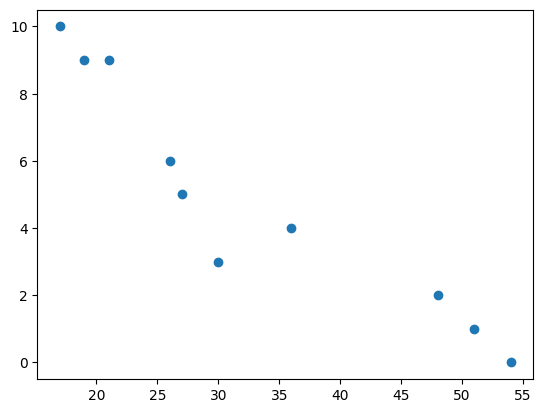

In [13]:
# Your code here.
plt.scatter(sol['Age'],sol['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
#mas joven mas tardon, mas viejo mas puntal

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [19]:
#a manita
cov=sol.Age.apply(lambda x : x-sol['Age'].mean())*sol.Tardies.apply(lambda x :x- sol.Tardies.mean())
sol_cov=cov.sum()/(len(cov)-1)
sol_cov

-45.56666666666667

In [20]:
covs=sol.Age.cov(sol.Tardies)
covs

-45.56666666666666

In [22]:
# Your response here.
sol_corr=sol[['Age','Tardies']].corr()
sol_corr

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
#la correlacon es inversamente proporcional al tiempo, es decir menor de edad mas tiempo
#cov negativa se mueven en distintas direcciones

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [28]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split as tts
X=sol.Age
y=sol.Tardies
X_train,X_test,y_train,y_test=tts(X,y)
lr=LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [ ]:
# Your response here.
#Utilizo el modelo de lineal regresion por que en el estudio sobre la dispercion se puede ver que es muy bajo apenas y tiene una forma casi lineal

Plot your regression model on your scatter plot.

In [34]:
y_pred=lr.predict(X_test.values.reshape(-1,1))

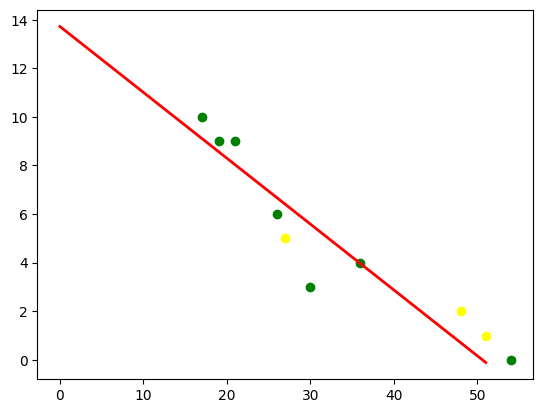

In [53]:
# Your code here.
plt.scatter(X_train, y_train, color='green')
plt.scatter(X_test, y_test, color='yellow')
x0 = 0
y0 = lr.predict([[x0]])  # Obtener el valor predicho en el punto x0

x1 = X_test.max()
y1 = lr.predict([[x1]])  # Obtener el valor predicho en el punto x1

# Trazar la línea de regresión utilizando los puntos calculados
plt.plot([x0, x1], [y0, y1], color='red', linewidth=2)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
#veo que freezer ha matado a dende con su rayo, mientras nuestros sayans se quedan atonitos
#desde este punto de vista y los datos obtenidos, si es un buen modelo

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [54]:
# Import any libraries you may need & the data
df=pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [64]:
y=df['CO2 Emission Grams/Mile']

In [65]:
# Your response here. 
X=df[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]

In [72]:
df2=pd.concat([X,y],axis=1)
df2.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


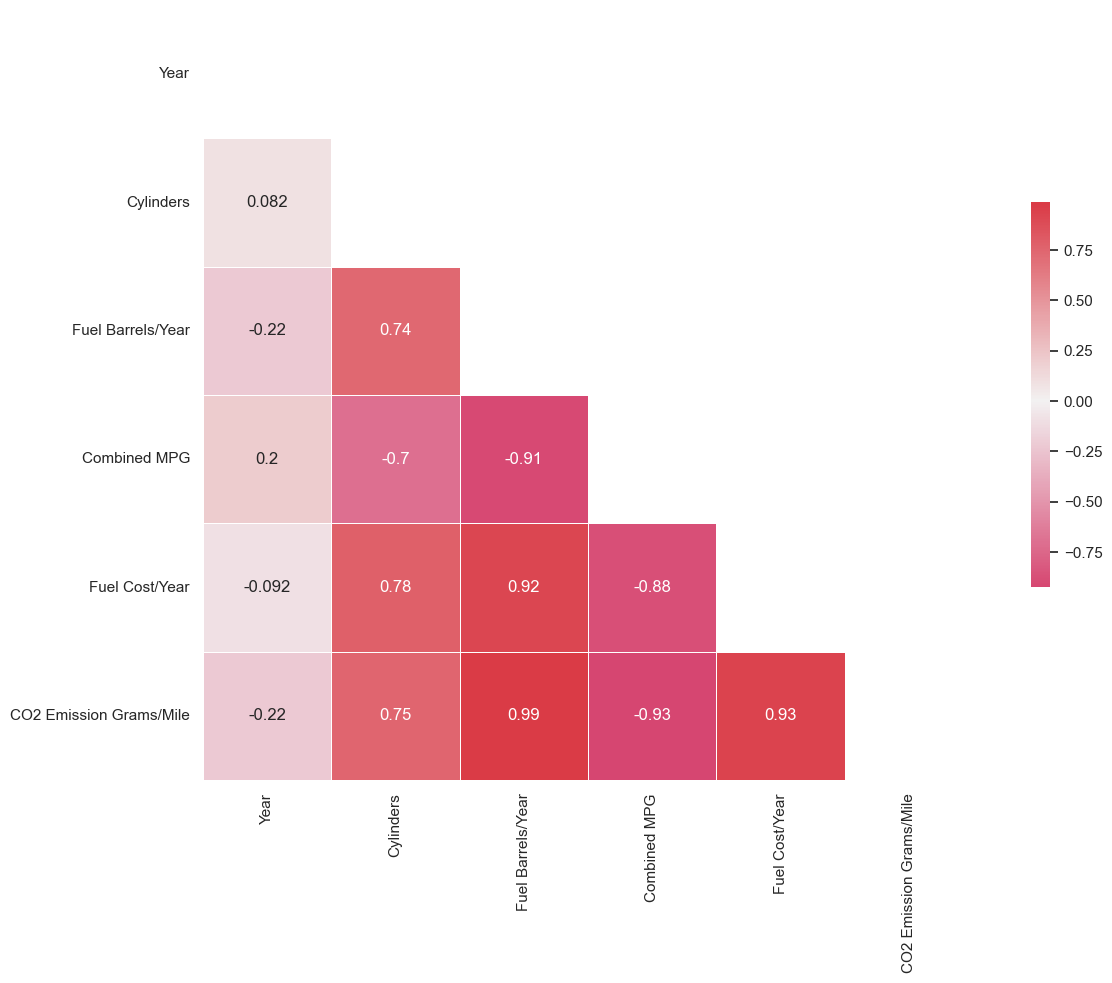

In [76]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df2.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df2.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});



Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [80]:
# Your response here. 


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [81]:
# Your response here. 
modelo = sm.OLS(y, X).fit()
y_pred = modelo.predict(X)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                             17:14:46   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

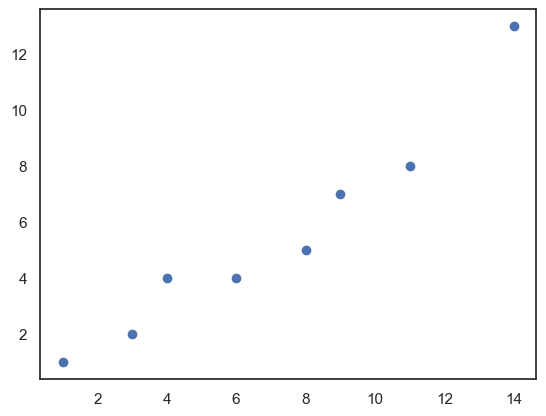

In [112]:
# Your code here.
df=pd.DataFrame({'X':[1,3,4,6,8,9,11,14],'y':[1,2,4,4,5,7,8,13]})
plt.scatter(df.X,df.y)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [113]:
# Your response here.
X=df.X
y=df.y
X_train,X_test,y_train,y_test=tts(X,y) 
lr=LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [114]:
y_pred=lr.predict(X_test.values.reshape(-1,1))

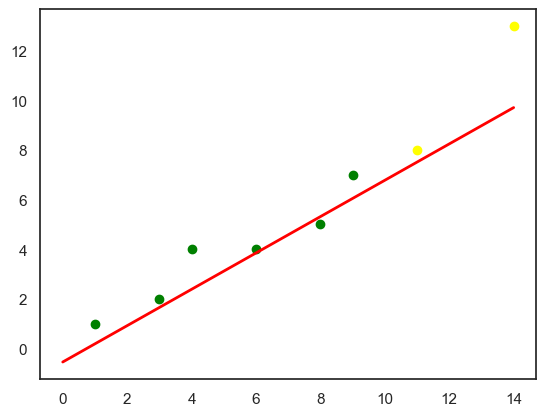

In [115]:
plt.scatter(X_train, y_train, color='green')
plt.scatter(X_test, y_test, color='yellow')

x1 = X_test.max()  # Obtener el valor máximo de X_test
y1 = lr.predict([[x1]])  # Obtener el valor predicho en el punto x1

# Trazar la línea de regresión utilizando los puntos calculados
plt.plot([x0, x1], [y0, y1], color='red', linewidth=2)


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [116]:
# Your response here. 
sol=df.drop(index=7)
X=sol.X
y=sol.y
X_train,X_test,y_train,y_test=tts(X,y) 
lr=LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [117]:
# Your response here. 
y_pred=lr.predict(X_test.values.reshape(-1,1))

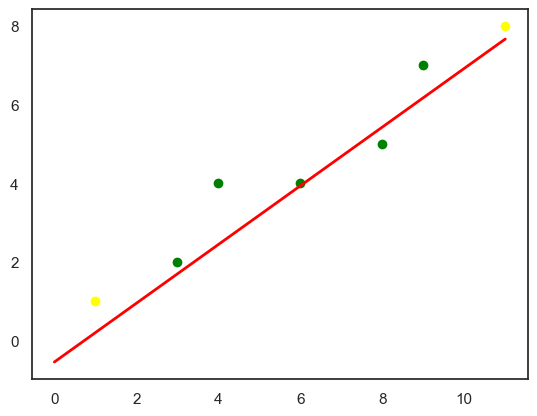

In [118]:
plt.scatter(X_train, y_train, color='green')
plt.scatter(X_test, y_test, color='yellow')

x1 = X_test.max()  # Obtener el valor máximo de X_test
y1 = lr.predict([[x1]])  # Obtener el valor predicho en el punto x1

# Trazar la línea de regresión utilizando los puntos calculados
plt.plot([x0, x1], [y0, y1], color='red', linewidth=2)
